In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord

plt.style.use('../clem.mplstyle')

## galactic to celestial coord

In [5]:
# l = galactic longitude
# b = galactic latitude
gc_l, gc_b = 7, -0.5

gc_galactic = SkyCoord(frame='galactic', l=gc_l*u.degree, b=gc_b*u.degree)

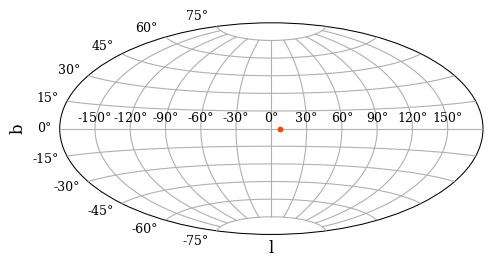

In [6]:
plt.subplot(111, projection='aitoff')
plt.grid(True, zorder=2)
plt.scatter(gc_galactic.l.wrap_at('180d').radian, gc_galactic.b.radian, s=10, marker='o', zorder=3)
plt.xlabel('l')
plt.ylabel('b');

In [7]:
gc_celestial = gc_galactic.icrs

GC_RA, GC_DEC = gc_celestial.ra.degree, gc_celestial.dec.wrap_at('180d').degree

In [8]:
baseline_db = '/Users/clairealice/Documents/share/sim_baseline/baseline_v3.3_10yrs.db'
con = sqlite3.connect(baseline_db)

# Some of the columns you might be interested in
cols = ['observationStartMJD', 'observationId', 'seeingFwhm500']
cols += ['fieldRA', 'fieldDec']
cols += ['rotSkyPos', 'rotTelPos']
cols += ['altitude', 'azimuth']
cols += ['sunAlt', 'moonAlt', 'moonRA', 'moonDec', 'moonDistance', 'moonPhase']

query = \
    """SELECT {:s} 
       FROM observations 
       WHERE (fieldRA BETWEEN {} AND {} AND fieldDec BETWEEN {} AND {} AND observationStartMJD BETWEEN {} AND {})
       """.format(', '.join(cols), GC_RA-0.5, GC_RA+0.5, GC_DEC-0.5, GC_DEC+0.5, 62629.290419-20, 62629.290419+20)

# Read these columns in from the "Summary" table, convert into a Pandas df
db = pd.read_sql_query(query, con)

In [9]:
1/360

0.002777777777777778

In [10]:
db

,observationStartMJD,observationId,seeingFwhm500,fieldRA,fieldDec,rotSkyPos,rotTelPos,altitude,azimuth,sunAlt,moonAlt,moonRA,moonDec,moonDistance,moonPhase
0,62629.290419,1086912,0.574435,270.870059,-23.168479,72.935847,-54.967293,77.826157,57.109798,-55.822402,-60.245381,110.140258,19.385499,161.664827,34.270633
1,62634.380597,1088836,1.135072,271.183161,-23.286549,289.084131,41.345119,65.628876,280.257156,-28.507953,-27.255253,173.157147,-2.472540,96.377275,67.953872
2,62634.392473,1088858,1.098537,271.183161,-23.286549,289.084131,40.089237,61.967356,276.969771,-24.839962,-30.488540,173.346814,-2.533441,96.179313,68.058017


In [11]:
np.hypot(db.loc[i_min, 'fieldRA']-db['fieldRA'], db.loc[i_min, 'fieldDec']-db['fieldDec']) * 60 * 60

NameError: name 'i_min' is not defined

In [12]:
i_min = np.hypot(GC_RA-db['fieldRA'], GC_DEC-db['fieldDec']).argmin()
db.iloc[i_min]

observationStartMJD    6.262929e+04
observationId          1.086912e+06
seeingFwhm500          5.744354e-01
fieldRA                2.708701e+02
fieldDec              -2.316848e+01
rotSkyPos              7.293585e+01
rotTelPos             -5.496729e+01
altitude               7.782616e+01
azimuth                5.710980e+01
sunAlt                -5.582240e+01
moonAlt               -6.024538e+01
moonRA                 1.101403e+02
moonDec                1.938550e+01
moonDistance           1.616648e+02
moonPhase              3.427063e+01
Name: 0, dtype: float64

In [13]:
GC_RA, GC_DEC

(270.83015398155993, -23.151189495745506)

In [14]:
db.iloc[i_min]['fieldRA'] + (1/360) * np.sqrt(2), db.iloc[i_min]['fieldDec'] + (1/360) * np.sqrt(2)

(270.87398786834717, -23.16455037524732)

In [17]:
-23.16+(1/360) * np.sqrt(2)

-23.15607162899341